## <img src="D:/transaction.png" alt="Transaction Image" width="40" style="vertical-align:middle;"/>  Financial Transactions Fraud Detection , and AI-Powered Banking Solution




# **📚 Read Libraries**


In [92]:
import pandas as pd 
import numpy as np 
import pyodbc 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# **💾 Upload Dataset from SQL Server**


In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=OMARFATHY-HP-EL;'
    'DATABASE=finance;'
    'Trusted_Connection=yes;'
)

# Connect to the server
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

In [4]:
query = "SELECT * FROM dbo.users_data"
df_users= pd.read_sql(query, conn)



In [5]:
df_users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5


In [6]:
query = "SELECT * FROM dbo.cards_data"
df_cards= pd.read_sql(query, conn)



In [7]:
df_cards.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,0,1362,Amex,Credit,393314135668401,04/2024,866,True,2,33900.0,01/1991,2014,No
1,1,550,Mastercard,Credit,5278231764792292,06/2024,396,True,1,11600.0,01/1994,2013,No
2,2,556,Mastercard,Debit,5889825928297675,09/2021,422,True,1,19948.0,01/1995,2011,No
3,3,1937,Visa,Credit,4289888672554714,04/2020,736,True,2,16400.0,01/1995,2015,No
4,4,1981,Mastercard,Debit,5433366978583845,03/2024,530,True,2,19439.0,01/1997,2007,No


In [8]:
query = "SELECT * FROM dbo.transactions_data"
df_trans= pd.read_sql(query, conn)




In [9]:
df_trans

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,None
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,None
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,None
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,None
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,None
...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,None
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,None,NaN,5815,None
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,None
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,None


In [10]:
df_trans = df_trans.sort_values(by='id').reset_index(drop=True)



In [11]:
df_trans

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,None
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,None
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,None
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,None
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,None
...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,None
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,None,NaN,5815,None
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,None
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,None


In [12]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          object        
 5   use_chip        object        
 6   merchant_id     int64         
 7   merchant_city   object        
 8   merchant_state  object        
 9   zip             float64       
 10  mcc             int64         
 11  errors          object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.2+ GB


## 📊 Missing Values Summary


In [13]:
df_trans.isna().mean()

id                0.000000
date              0.000000
client_id         0.000000
card_id           0.000000
amount            0.000000
use_chip          0.000000
merchant_id       0.000000
merchant_city     0.000000
merchant_state    0.117519
zip               0.124208
mcc               0.000000
errors            0.984113
dtype: float64

## 📊 handle transaction dataset to merge


In [14]:
 df_trans.drop(columns=['errors','zip','merchant_state'],inplace=True)


In [15]:
df_trans

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,mcc
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,5499
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,5311
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,4829
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,4829
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,5813
...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,5499
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,5815
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,4900
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,5411


In [16]:
df_trans['amount'] = df_trans['amount'].replace('[\$,]', '', regex=True).astype('float32')


In [17]:
for col in ['id', 'client_id', 'card_id', 'merchant_id']:
    df_trans[col] = df_trans[col].astype('int32')

df_trans['mcc'] = df_trans['mcc'].astype('int16')

## ℹ️ Datasets Information


In [18]:
df_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6146 non-null   int64  
 1   client_id              6146 non-null   int64  
 2   card_brand             6146 non-null   object 
 3   card_type              6146 non-null   object 
 4   card_number            6146 non-null   int64  
 5   expires                6146 non-null   object 
 6   cvv                    6146 non-null   int64  
 7   has_chip               6146 non-null   bool   
 8   num_cards_issued       6146 non-null   int64  
 9   credit_limit           6146 non-null   float64
 10  acct_open_date         6146 non-null   object 
 11  year_pin_last_changed  6146 non-null   int64  
 12  card_on_dark_web       6146 non-null   object 
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 582.3+ KB


In [19]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   float64
 10  yearly_income      2000 non-null   float64
 11  total_debt         2000 non-null   float64
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 218.9+ KB


In [20]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             int32         
 1   date           datetime64[ns]
 2   client_id      int32         
 3   card_id        int32         
 4   amount         float32       
 5   use_chip       object        
 6   merchant_id    int32         
 7   merchant_city  object        
 8   mcc            int16         
dtypes: datetime64[ns](1), float32(1), int16(1), int32(4), object(2)
memory usage: 583.7+ MB


## 🔁 Checking for Duplicates


In [21]:
df_users.duplicated().sum()

np.int64(0)

In [22]:
df_cards.duplicated().sum()

np.int64(0)

##  **🔗 Merge Cards with Users on client_id**


In [60]:
df_cards_users = df_cards.merge(
    df_users,
    left_on='client_id',   # client_id in Cards
    right_on='id',         # id in Users
    how='left',
    suffixes=('_card', '_user')
)

In [61]:
df_cards_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_card                6146 non-null   int64  
 1   client_id              6146 non-null   int64  
 2   card_brand             6146 non-null   object 
 3   card_type              6146 non-null   object 
 4   card_number            6146 non-null   int64  
 5   expires                6146 non-null   object 
 6   cvv                    6146 non-null   int64  
 7   has_chip               6146 non-null   bool   
 8   num_cards_issued       6146 non-null   int64  
 9   credit_limit           6146 non-null   float64
 10  acct_open_date         6146 non-null   object 
 11  year_pin_last_changed  6146 non-null   int64  
 12  card_on_dark_web       6146 non-null   object 
 13  id_user                6146 non-null   int64  
 14  current_age            6146 non-null   int64  
 15  reti

## 📈 Summary Statistics


In [64]:
df_cards_users.describe()

,id_card,client_id,card_number,cvv,num_cards_issued,credit_limit,year_pin_last_changed,id_user,current_age,retirement_age,birth_year,birth_month,latitude,longitude,per_capita_income,yearly_income,total_debt,num_credit_cards
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,14347.493980,2013.436707,994.939636,50.139766,66.544582,1969.050439,6.467296,37.314732,-91.801489,23254.139440,45313.309795,57644.721445,3.945005
std,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,12014.463884,4.270699,578.614626,18.975960,3.455030,18.969825,3.547927,5.148899,16.454556,11512.323216,23314.172216,51633.885249,1.668031
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,0.000000,2002.000000,0.000000,18.000000,50.000000,1918.000000,1.000000,20.879999,-159.410004,0.000000,1.000000,0.000000,1.000000
25%,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,7042.750000,2010.000000,492.250000,35.000000,65.000000,1957.000000,3.000000,33.820000,-97.510002,16844.000000,32295.000000,16803.000000,3.000000
50%,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,12592.500000,2013.000000,992.000000,50.000000,67.000000,1970.000000,7.000000,38.160000,-86.795002,20646.500000,40251.000000,51529.500000,4.000000
75%,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,19156.500000,2017.000000,1495.000000,63.000000,69.000000,1984.000000,10.000000,41.130001,-80.129997,26369.000000,52531.500000,84494.500000,5.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,151223.000000,2020.000000,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200001,-68.669998,163145.000000,307018.000000,516263.000000,9.000000


## **📂 Read JSON Files and Merge Transaction with MCC and Fraud**


In [25]:
import json

# Open and load the JSON file
with open(r"D:\Asmaa\archive\mcc_codes.json", 'r') as file:
    data = json.load(file)

df_mcc_codes = pd.DataFrame(list(data.items()), columns=['mcc', 'Description'])

df_mcc_codes


,mcc,Description
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees
...,...,...
104,7549,Towing Services
105,5941,Sporting Goods Stores
106,5722,Household Appliance Stores
107,3009,Fabricated Structural Metal Products


In [26]:
df_mcc_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mcc          109 non-null    object
 1   Description  109 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [27]:
df_mcc_codes['mcc'] = df_mcc_codes['mcc'].astype(int)


In [28]:
# Merge Transactions with MCC codes
df_trans_mcc = df_trans.merge(df_mcc_codes, on='mcc', how='left')


In [29]:
df_trans_mcc.isna().sum()

id               0
date             0
client_id        0
card_id          0
amount           0
use_chip         0
merchant_id      0
merchant_city    0
mcc              0
Description      0
dtype: int64

In [30]:
import json

# Open and load the JSON file
with open(r"D:\Asmaa\archive\train_fraud_labels.json", 'r') as file:
    data1 = json.load(file)



In [31]:
df_train_fraud_labels= pd.DataFrame(list(data1['target'].items()), columns=['id', 'Value'])


In [32]:
df_train_fraud_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      object
 1   Value   object
dtypes: object(2)
memory usage: 136.0+ MB


In [33]:
df_train_fraud_labels['id'] = df_train_fraud_labels['id'].astype(int)


In [34]:
df_trans_mcc_fraud = df_trans_mcc.merge(df_train_fraud_labels, left_on='id', right_on='id', how='left')


## 📊 Missing Values Summary


In [35]:
df_trans_mcc_fraud.isna().sum()

id                     0
date                   0
client_id              0
card_id                0
amount                 0
use_chip               0
merchant_id            0
merchant_city          0
mcc                    0
Description            0
Value            4390952
dtype: int64

In [36]:
df_trans_mcc_fraud['Value'] = df_trans_mcc_fraud['Value'].fillna('No Attempt')


In [37]:
df_trans_mcc_fraud['Value'].value_counts()

Value
No            8901631
No Attempt    4390952
Yes             13332
Name: count, dtype: int64

In [38]:
df_trans_mcc_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             int32         
 1   date           datetime64[ns]
 2   client_id      int32         
 3   card_id        int32         
 4   amount         float32       
 5   use_chip       object        
 6   merchant_id    int32         
 7   merchant_city  object        
 8   mcc            int16         
 9   Description    object        
 10  Value          object        
dtypes: datetime64[ns](1), float32(1), int16(1), int32(4), object(4)
memory usage: 786.7+ MB


In [39]:
df_trans_mcc_fraud['date'] = pd.to_datetime(df_trans_mcc_fraud['date'])


In [40]:
df_trans_mcc_fraud['year'] = df_trans_mcc_fraud['date'].dt.year
df_trans_mcc_fraud['month'] = df_trans_mcc_fraud['date'].dt.month
df_trans_mcc_fraud['day'] = df_trans_mcc_fraud['date'].dt.day

In [179]:
df_trans_mcc_fraud['hour'] = df_trans_mcc_fraud['date'].dt.hour


In [43]:
df_cards_users.isna().sum()

id_card                  0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
id_user                  0
current_age              0
retirement_age           0
birth_year               0
birth_month              0
gender                   0
address                  0
latitude                 0
longitude                0
per_capita_income        0
yearly_income            0
total_debt               0
credit_score             0
num_credit_cards         0
dtype: int64

In [44]:
df_cards_users.duplicated().sum()

np.int64(0)

## **🛠️ Handle Data**


In [63]:
def credit_score_category(score):
    if pd.isna(score):
        return "Unknown"
    elif score < 580:
        return "Poor"
    elif 580 <= score < 670:
        return "Fair"
    elif 670 <= score < 740:
        return "Good"
    elif 740 <= score < 800:
        return "Very Good"
    else:
        return "Excellent"

df_cards_users["credit_score"] = df_cards_users["credit_score"].apply(credit_score_category)

print(df_cards_users["credit_score"].value_counts())


credit_score
Good         2984
Very Good    1596
Fair          823
Excellent     572
Poor          171
Name: count, dtype: int64


In [75]:
df_clean = df_cards_users[(df_cards_users['per_capita_income'] > 0) & (df_cards_users['yearly_income'] > 0)]


In [74]:
median_per_capita = df_cards_users['per_capita_income'].median()
median_yearly_income = df_cards_users['yearly_income'].median()

df_cards_users['per_capita_income'].replace(0, median_per_capita, inplace=True)
df_cards_users['yearly_income'].replace(0, median_yearly_income, inplace=True)


In [77]:
print(df_clean["card_brand"].value_counts())
print(df_clean["gender"].value_counts())
print(df_clean["card_on_dark_web"].value_counts())


card_brand
Mastercard    3209
Visa          2326
Amex           402
Discover       209
Name: count, dtype: int64
gender
Female    3139
Male      3007
Name: count, dtype: int64
card_on_dark_web
No    6146
Name: count, dtype: int64


Feature Engineering

In [125]:
df_cards_users['acct_open_year'] = pd.to_datetime(df_clean['acct_open_date']).dt.year

# Age when the card was issued
df_cards_users['age_at_issue'] = df_cards_users['acct_open_year'] - df_cards_users['birth_year']

# Debt-to-income ratio
df_cards_users['debt_to_income_ratio'] = df_cards_users['total_debt'] / df_cards_users['yearly_income']




In [124]:
cards_per_client

client_id
0       4
1       3
2       5
3       4
4       5
       ..
1995    4
1996    3
1997    7
1998    3
1999    2
Name: id_card, Length: 2000, dtype: int64

Card Brand vs Average Credit Limit

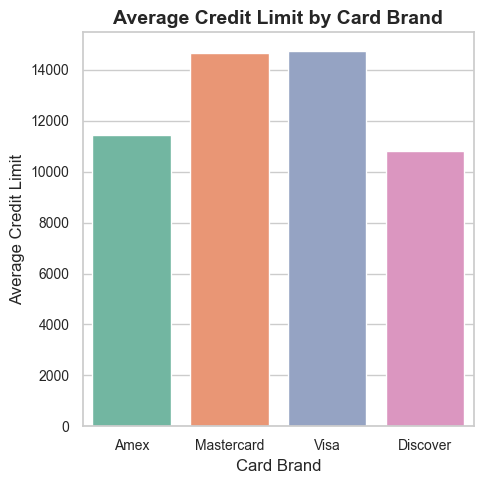

In [146]:
plt.figure(figsize=(5,5))
sns.barplot(data=df_clean, x='card_brand', y='credit_limit', estimator=np.mean, palette="Set2", errorbar=None)
plt.title("Average Credit Limit by Card Brand", fontsize=14, fontweight="bold")
plt.xlabel("Card Brand", fontsize=12)
plt.ylabel("Average Credit Limit", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Debt-to-Income Ratio Distribution

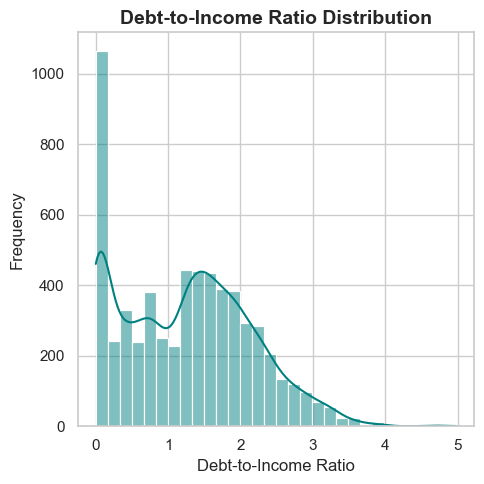

In [151]:
plt.figure(figsize=(5,5))
sns.histplot(data=df_clean, x='debt_to_income_ratio', kde=True, bins=30, color="teal")
plt.title("Debt-to-Income Ratio Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Debt-to-Income Ratio", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


In [83]:
def risk_category(ratio):
    if ratio < 0.3:
        return "Low Risk"
    elif 0.3 <= ratio <= 0.5:
        return "Medium Risk"
    else:
        return "High Risk"

df_cards_users['risk_level'] = df_cards_users['debt_to_income_ratio'].apply(risk_category)


In [102]:
counts=df_cards_users['risk_level'].value_counts()

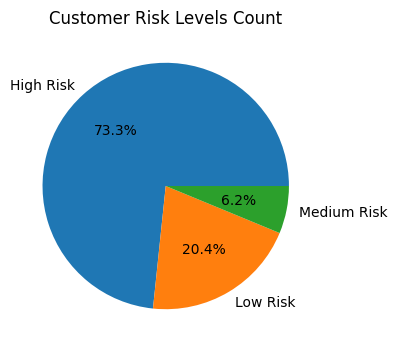

In [104]:
plt.figure(figsize=(6,4))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title("Customer Risk Levels Count")
plt.show()


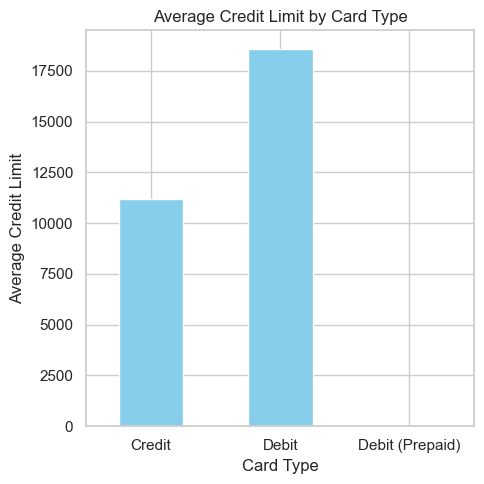

In [118]:
# Average credit limit per card type
avg_credit_by_type = df_cards_users.groupby('card_type')['credit_limit'].mean()
plt.figure(figsize=(5,5))
avg_credit_by_type.plot(kind='bar', color='skyblue')
plt.title("Average Credit Limit by Card Type")
plt.ylabel("Average Credit Limit")
plt.xlabel("Card Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

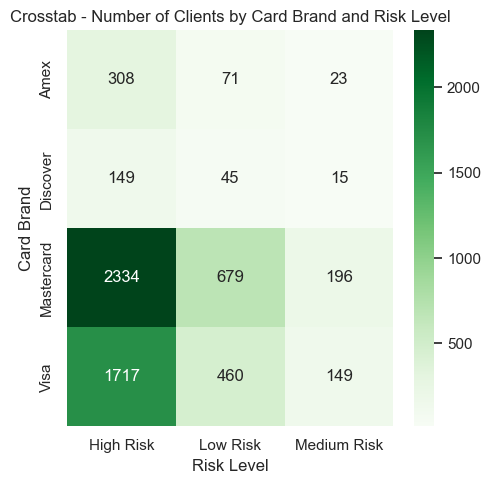

In [117]:
crosstab_clients = pd.crosstab(df_cards_users['card_brand'], df_cards_users['risk_level'])
plt.figure(figsize=(5,5))
sns.heatmap(crosstab_clients, annot=True, fmt="d", cmap="Greens")
plt.title("Crosstab - Number of Clients by Card Brand and Risk Level")
plt.ylabel("Card Brand")
plt.xlabel("Risk Level")
plt.tight_layout()
plt.show()

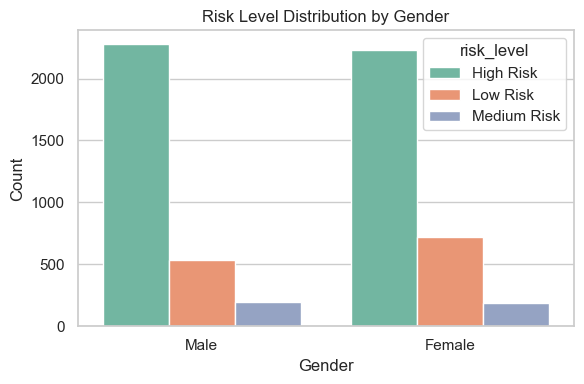

In [121]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_cards_users, x="gender", hue="risk_level", palette="Set2")
plt.title("Risk Level Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [126]:
# Count how many cards each client has
cards_per_client = df_cards_users.groupby(["client_id", "gender"])["id_card"].count().reset_index()
cards_per_client.rename(columns={"id_card": "cards_count_verified"}, inplace=True)

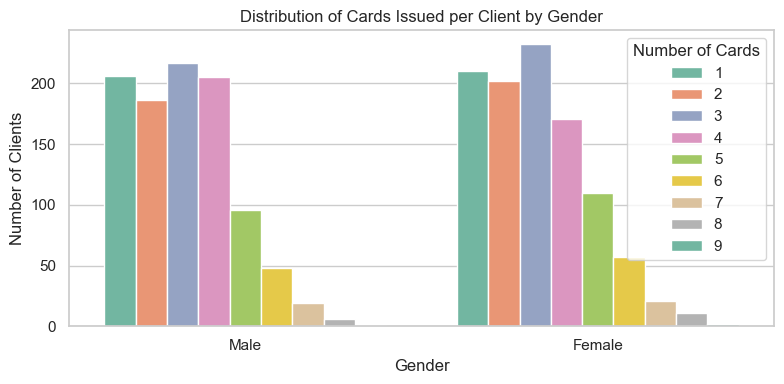

In [128]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=cards_per_client,
    x="gender",
    hue="cards_count_verified",  # Number of cards per client
    palette="Set2"
)
plt.title("Distribution of Cards Issued per Client by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Clients")
plt.legend(title="Number of Cards")
plt.tight_layout()
plt.show()

In [228]:
import folium
from folium.plugins import HeatMap

# Initialize map centered around mean coordinates
m = folium.Map(location=[df_cards_users['latitude'].mean(), df_cards_users['longitude'].mean()], zoom_start=10)

# Prepare data for heatmap (latitude, longitude, weight=income)
heat_data = [[row['latitude'], row['longitude'], row['per_capita_income']] for idx, row in df_cards_users.iterrows()]

# Add HeatMap
my_map=HeatMap(heat_data, radius=10, max_zoom=13).add_to(m)





In [229]:
my_map

In [ ]:
m.save("my_map.html")


**💡 Note:** We note that the highest income is in New York and the East of USA.


# 💳 Transaction Data


##### 📈 Summary Statistics


In [152]:
df_trans_mcc_fraud.describe()

,id,date,client_id,card_id,amount,merchant_id,mcc,year,month,day
count,1.330592e+07,13305915,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07
mean,1.558402e+07,2015-01-06 06:50:27.604354816,1.026812e+03,3.475268e+03,4.297605e+01,4.772376e+04,5.565440e+03,2.014520e+03,6.454595e+00,1.572108e+01
min,7.475327e+06,2010-01-01 00:01:00,0.000000e+00,0.000000e+00,-5.000000e+02,1.000000e+00,1.711000e+03,2.010000e+03,1.000000e+00,1.000000e+00
25%,1.150604e+07,2012-08-08 21:43:00,5.190000e+02,2.413000e+03,8.930000e+00,2.588700e+04,5.300000e+03,2.012000e+03,4.000000e+00,8.000000e+00
50%,1.557087e+07,2015-01-22 12:17:00,1.070000e+03,3.584000e+03,2.899000e+01,4.592600e+04,5.499000e+03,2.015000e+03,6.000000e+00,1.600000e+01
75%,1.965361e+07,2017-06-13 17:45:00,1.531000e+03,4.901000e+03,6.371000e+01,6.757000e+04,5.812000e+03,2.017000e+03,9.000000e+00,2.300000e+01
max,2.376187e+07,2019-10-31 23:59:00,1.998000e+03,6.144000e+03,6.820200e+03,1.003420e+05,9.402000e+03,2.019000e+03,1.200000e+01,3.100000e+01
std,4.704499e+06,NaN,5.816386e+02,1.674356e+03,8.165575e+01,2.581534e+04,8.757002e+02,2.814220e+00,3.410946e+00,8.795410e+00


> 📝 **Note:**  
> - 👥 `client_id` and 💳 `card_id` start at 0, which may indicate placeholder values.  
> - 💸 `amount` contains outliers, including negative values and very high transactions.


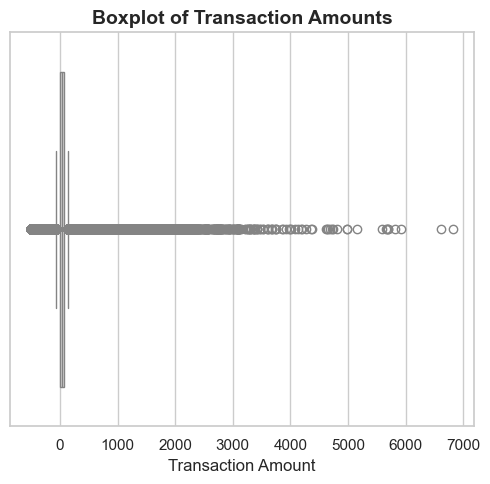

In [157]:
plt.figure(figsize=(5,5))
sns.boxplot(x='amount', data=df_trans_mcc_fraud, palette="coolwarm", showfliers=True)
plt.title("Boxplot of Transaction Amounts", fontsize=14, fontweight="bold")
plt.xlabel("Transaction Amount", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


> 💡 **Handling Outliers:**  
> - There's outliers in `amount`, but it's real important data.  
> - I will use **log transform** to handle the big numbers.


In [158]:
df_trans_mcc_fraud['amount_log'] = np.sign(df_trans_mcc_fraud['amount']) * np.log1p(np.abs(df_trans_mcc_fraud['amount']))


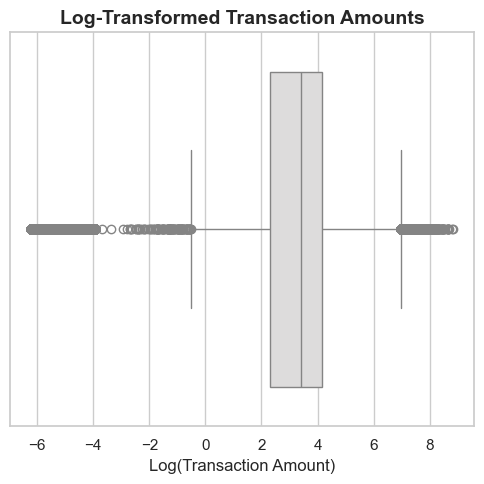

In [159]:
plt.figure(figsize=(5,5))
sns.boxplot(x='amount_log', data=df_trans_mcc_fraud, palette="coolwarm", showfliers=True)
plt.title("Log-Transformed Transaction Amounts", fontsize=14, fontweight="bold")
plt.xlabel("Log(Transaction Amount)", fontsize=12)
plt.tight_layout()
plt.show()

In [160]:
(df_trans_mcc_fraud['client_id'] == 0).sum()

np.int64(12795)

In [161]:
(df_trans_mcc_fraud['card_id'] == 0).sum()

np.int64(3402)

In [166]:
df_trans_mcc_fraud['unique_id'] = range(1, len(df_trans_mcc_fraud)+1)


In [214]:
len(df_trans_mcc_fraud['Description'].unique())

108

#### ✨ **Top 10 Descriptions by Transaction Count** ✨


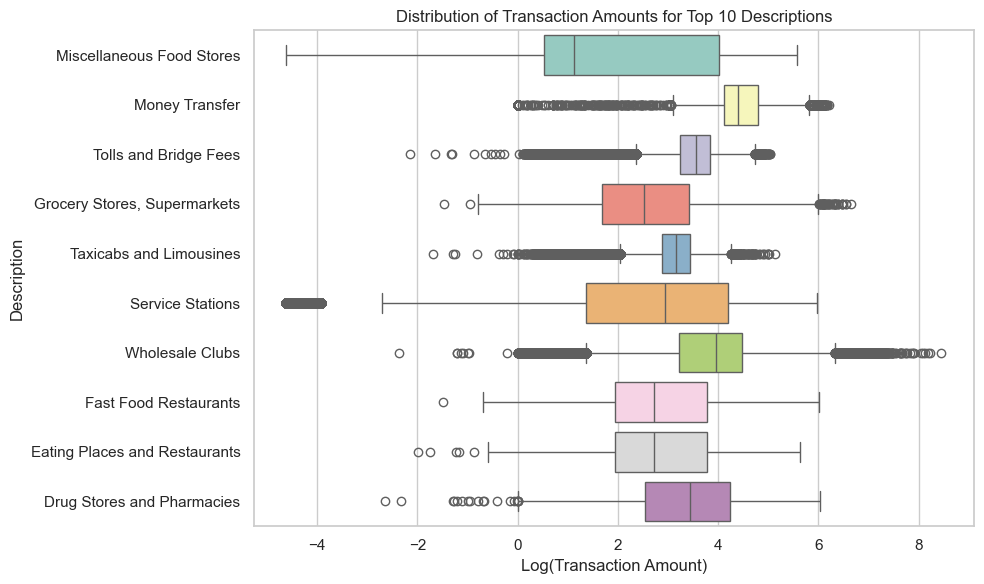

In [168]:
# Top 10 Descriptions by Transaction Count
top_desc = df_trans_mcc_fraud['Description'].value_counts().nlargest(10).index

plt.figure(figsize=(10,6))
sns.boxplot(x='amount_log', y='Description', data=df_trans_mcc_fraud[df_trans_mcc_fraud['Description'].isin(top_desc)], palette="Set3", showfliers=True); plt.title("Distribution of Transaction Amounts for Top 10 Descriptions"); plt.xlabel("Log(Transaction Amount)"); plt.ylabel("Description"); plt.tight_layout(); plt.show()


## ✨ **Distribution of Transaction Amounts** ✨


In [169]:
df_trans_mcc_fraud.groupby('Description')['amount'].agg(['count','mean','sum']).sort_values('count', ascending=False)


,count,mean,sum
Description,,,
"Grocery Stores, Supermarkets",1592584,25.725962,4.097076e+07
Miscellaneous Food Stores,1460875,10.652911,1.556257e+07
Service Stations,1424711,20.755386,2.957043e+07
Eating Places and Restaurants,999738,26.355131,2.634823e+07
Drug Stores and Pharmacies,772913,45.430119,3.511353e+07
...,...,...,...
Miscellaneous Fabricated Metal Products,351,786.780518,2.761600e+05
Household Appliance Stores,348,460.590881,1.602856e+05
"Bolt, Nut, Screw, Rivet Manufacturing",337,761.095337,2.564891e+05


### 📈 Line Plot: Total Transaction Amount per Year


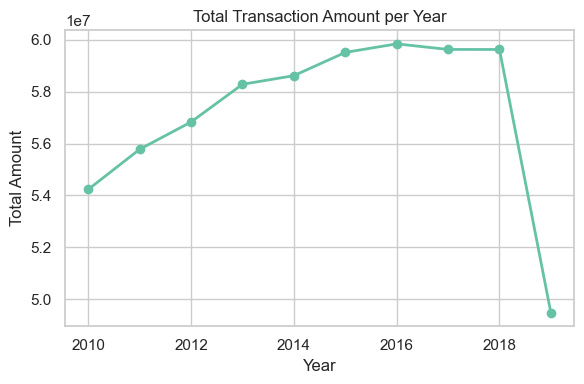

In [177]:
plt.figure(figsize=(6,4))
colors = sns.color_palette("Set2", 8)  
df_trans_mcc_fraud.groupby("year")["amount"].sum().plot(kind="line", marker="o", color=colors[0], linewidth=2)
plt.title("Total Transaction Amount per Year"); plt.xlabel("Year"); plt.ylabel("Total Amount")
plt.tight_layout(); plt.show()

#### 📊 Yearly Insight
**Observation:** Most transactions in the dataset occurred in **2016**.


<Axes: xlabel='hour', ylabel='amount'>

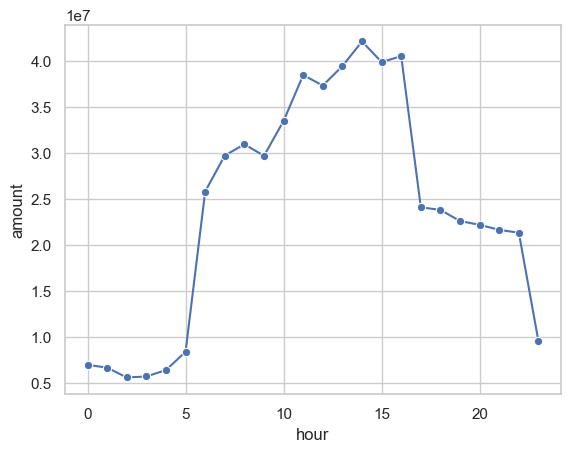

In [182]:
sns.lineplot(data=df_trans_mcc_fraud.groupby('hour')['amount'].sum().reset_index(), x='hour', y='amount', marker='o')


#### 💡 Transaction Insight
**Observation:** The majority of transactions occur between **1 PM and 2 PM**.


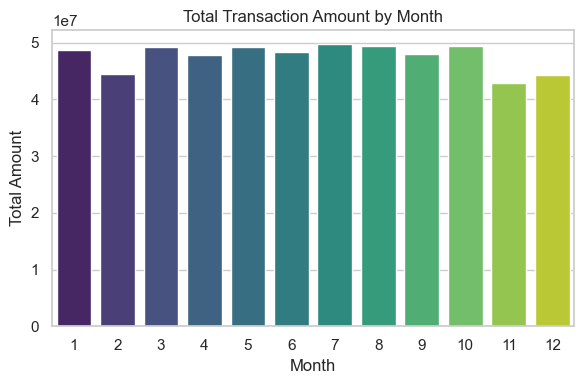

In [184]:

plt.figure(figsize=(6,4))
sns.barplot(data=df_trans_mcc_fraud.groupby('month')['amount'].sum().reset_index()
, x='month', y='amount', palette='viridis')
plt.title("Total Transaction Amount by Month")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.show()


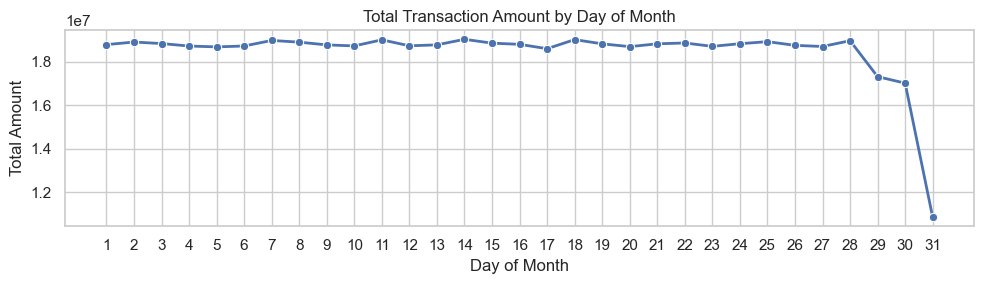

In [186]:
day_sum = df_trans_mcc_fraud.groupby('day')['amount'].sum().reset_index()

plt.figure(figsize=(10,3))
sns.lineplot(data=day_sum, x='day', y='amount', marker='o', linewidth=2, palette='viridis')
plt.title("Total Transaction Amount by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Total Amount")
plt.xticks(range(1,32))  # تظهر كل الأيام من 1 إلى 31
plt.tight_layout()
plt.show()

**💡 Note:** The highest transaction amount occurs on **Day 14** of the month.


In [191]:
fraud_count = df_trans_mcc_fraud['Value'].value_counts()
print(fraud_count)


Value
No            8901631
No Attempt    4390952
Yes             13332
Name: count, dtype: int64


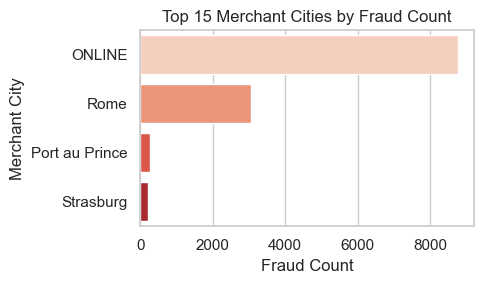

In [200]:
top_fraud = df_trans_mcc_fraud.groupby('merchant_city')['Value'].apply(lambda x: (x=='Yes').sum()).sort_values(ascending=False).head(4).reset_index()
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(data=top_fraud, y='merchant_city', x='Value', palette='Reds', ax=ax)
ax.set_title("Top 15 Merchant Cities by Fraud Count")
ax.set_xlabel("Fraud Count")
ax.set_ylabel("Merchant City")
plt.tight_layout()
plt.show()

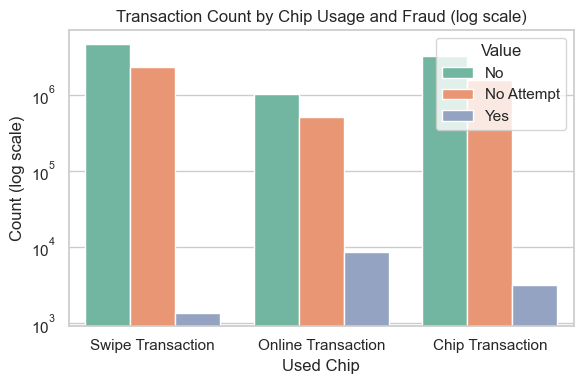

In [204]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_trans_mcc_fraud, x='use_chip', hue='Value', palette='Set2', ax=ax)
ax.set_yscale('log')
ax.set_title("Transaction Count by Chip Usage and Fraud (log scale)")
ax.set_xlabel("Used Chip")
ax.set_ylabel("Count (log scale)")
plt.tight_layout()
plt.show()


<h3 style="color: darkblue;">💡 Note:</h3>
<p style="color: darkgreen; font-weight: bold;">
Highest fraud attempts in online transactions where the chip was used occurred  <span style="color: red;"></span>.
</p>


<h3 style="color: darkblue;"> Save my project:</h3>


In [223]:
df_cards_users.to_csv("df_cards_users.csv", index=False)


In [ ]:
df_trans_mcc_fraud.to_csv("df_trans_mcc_fraud.csv", index=False)
